In [1]:
import numpy as np
import cv2

%matplotlib inline
from matplotlib import pyplot as plt

np.random.seed(42)

In [2]:
#Define a routine to fix a color issue to ensure colors are seen correctly in matplotlib
#Routine to fix 
def fixColor(image):
    return(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

Extract background in a video.
We identify a background we will have to use filtering techniques. An easy way to do this is to take a few random frames from the video and finding the median of it. We do this by finding the median of every pixel. This works because most of the time there is no vehicle passing over the road. The median will end filtering all moving objects in the video.

Note that this works if the camera is static and not moving.

In the section we capture the video in a video stream and get 30 random frames. These frames are saved in the array frames

In [4]:
video_stream = cv2.VideoCapture('sample.mp4')

# Randomly select 30 frames
frameIds = video_stream.get(cv2.CAP_PROP_FRAME_COUNT) * np.random.uniform(size=30)

# Store selected frames in an array
frames = []
for fid in frameIds:
    video_stream.set(cv2.CAP_PROP_POS_FRAMES, fid)
    ret, frame = video_stream.read()
    frames.append(frame)
    
video_stream.release()

In [5]:
frameIds

array([ 9434.66559377, 23948.49337847, 18438.92739423, 15080.20721692,
        3930.10955274,  3929.50196727,  1463.12619052, 21818.97711207,
       15142.08714581, 17836.34823468,   518.52341131, 24432.02917596,
       20969.23012176,  5348.82219799,  4580.17092395,  4619.95960321,
        7663.86210015, 13218.61451282, 10880.69501959,  7336.06204159,
       15412.57441806,  3513.85034982,  7359.1236966 ,  9228.65483257,
       11488.40290243, 19778.58246749,  5029.78257257, 12953.56550364,
       14922.92298963,  1170.08589642])

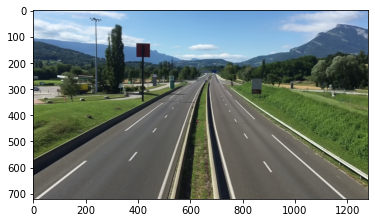

In [6]:
#We will now calculate the median and average frames for saved frames. We will use the median as it remove outliers better.
# Calculate the median along the time axis
medianFrame = np.median(frames, axis=0).astype(dtype=np.uint8)
plt.imshow(fixColor(medianFrame))

Processing a frame¶


In [7]:
writer = cv2.VideoWriter("output1.mp4",cv2.VideoWriter_fourcc(*"MP4V"), 30,(640,480))

#Create a new video stream and get total frame count
video_stream = cv2.VideoCapture('sample.mp4')
total_frames=video_stream.get(cv2.CAP_PROP_FRAME_COUNT)
print(total_frames)


25190.0


In [8]:
frameCnt=0
while(frameCnt < total_frames-1):

    frameCnt+=1
    ret, frame = video_stream.read()

    # Convert current frame to grayscale
    gframe = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # Calculate absolute difference of current frame and the median frame
    grayMedianFrame = cv2.cvtColor(medianFrame, cv2.COLOR_BGR2GRAY)
    dframe = cv2.absdiff(gframe, grayMedianFrame)
    # Gaussian
    blurred = cv2.GaussianBlur(dframe,(11,11),0)
    #Thresholding to binarise
    ret, tframe= cv2.threshold(blurred,0,255,
                               cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    #Identifying contours from the threshold
    (cnts, _) = cv2.findContours(tframe.copy(), 
                                 cv2.RETR_EXTERNAL, cv2 .CHAIN_APPROX_SIMPLE)
    #For each contour draw the bounding bos
    for cnt in cnts:
        x,y,w,h = cv2.boundingRect(cnt)
        if y > 200: # Disregard items in the top of the picture
            cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)

    writer.write(cv2.resize(frame, (640,480)))
 
#Release video object
video_stream.release()
writer.release()